In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf

In [2]:
df1=pd.read_csv ('clean_df.csv')

In [3]:
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1

,time_close,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,10Y_Treasury,Gold,Oil,EUR_USD
symbol_id,,,,,,,,,,,,,,,,,
BTCB_4023,2020-09-24,10475.684721,1.138708e+04,0.000000e+00,9,24,3,1,-0.010546,1.915524,0.039526,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
BTCB_4023,2020-09-25,10889.743248,1.384086e+03,0.000000e+00,9,25,4,1,0.039526,-0.878451,-0.029131,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-26,10572.518703,3.690903e+03,0.000000e+00,9,26,5,0,-0.029131,1.666671,0.019034,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-27,10773.752004,6.771302e+03,0.000000e+00,9,27,6,0,0.019034,0.834592,0.006752,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-28,10846.499092,3.646642e+03,0.000000e+00,9,28,0,1,0.006752,-0.461456,-0.013387,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FTT_4195,2022-09-29,24.068050,7.976498e+07,3.224523e+09,9,29,3,1,0.015881,-0.219820,0.009143,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
FTT_4195,2022-09-30,24.288116,7.723532e+07,3.254006e+09,9,30,4,1,0.009143,-0.031714,-0.002232,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
FTT_4195,2022-10-01,24.233912,7.605522e+07,3.246744e+09,10,1,5,0,-0.002232,-0.015279,0.000811,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [4]:
dfcoin=df1.loc['XMR_328']
dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)
dfcoin.set_index(['time_close'],inplace=True)
dfcoin

/tmp/ipykernel_99951/2305753644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)


,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [5]:
#Adding other coins in regression
dfBTC=df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
dfBTC1=dfBTC['BTC_close']

dfETH=df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
dfETH1=dfETH['ETH_close']

dfLTC=df1.loc['LTC_2']
dfLTC.set_index(['time_close'],inplace=True)
dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
dfLTC1=dfLTC['LTC_close']

dfreg=pd.concat([dfcoin,dfBTC1,dfETH1,dfLTC1],axis=1)
dfreg

/tmp/ipykernel_99951/3118045978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
/tmp/ipykernel_99951/3118045978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
/tmp/ipykernel_99951/3118045978.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)


,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD,BTC_close,ETH_close,LTC_close
time_close,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854,10295.054804,322.801017,43.575650
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,10773.534000,348.029329,44.790372
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,10668.141934,351.552190,46.090238
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,10769.604523,359.182175,46.340146
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535,10881.984006,358.283277,46.434781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817,19445.124438,1333.964086,53.258766
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,19532.627889,1336.776474,53.855640
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,19400.000434,1327.829013,53.365201


EDA for XMR

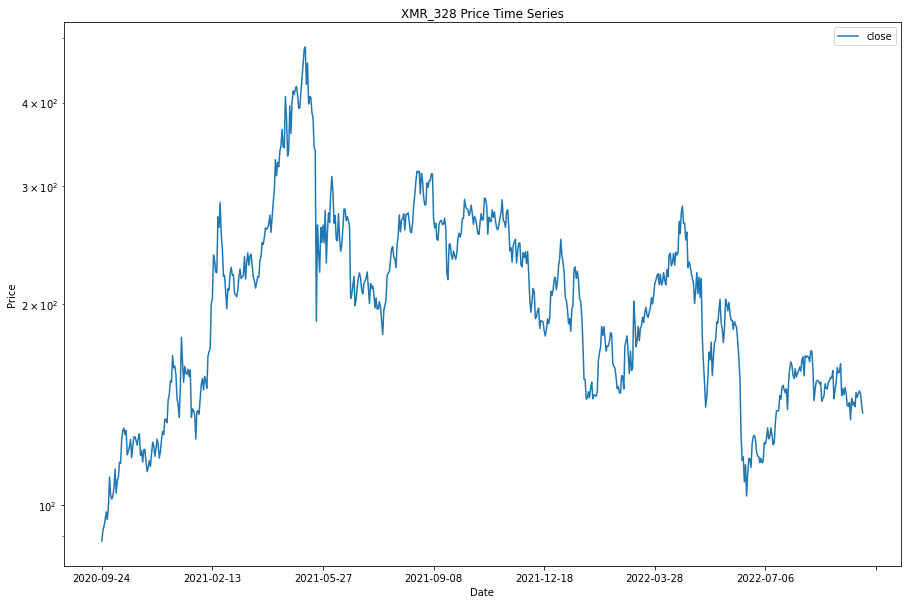

In [6]:
dfreg.plot(y=['close'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XMR_328 Price Time Series')
plt.show()

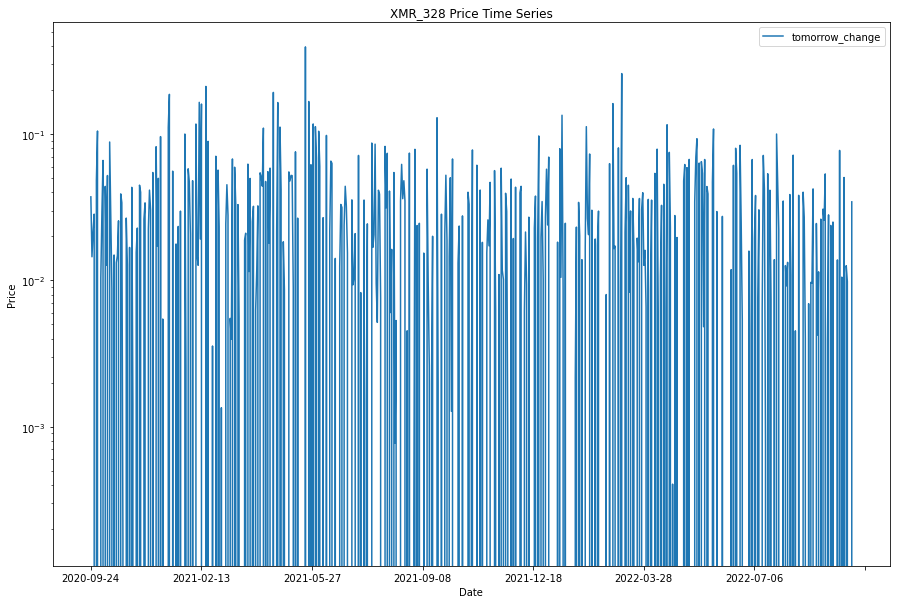

In [7]:
dfreg.plot(y=['tomorrow_change'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XMR_328 Price Time Series')
plt.show()

Test for stationarity

ADF Statistic: -8.507309
p-value: 0.000000


ADF Statistic: -1.919940
p-value: 0.322740


ADF Statistic: -2.300683
p-value: 0.171748


ADF Statistic: -4.320312
p-value: 0.000410


ADF Statistic: 0.307875
p-value: 0.977703


ADF Statistic: -2.125103
p-value: 0.234541


ADF Statistic: -1.902342
p-value: 0.330960


ADF Statistic: 0.643501
p-value: 0.988640


ADF Statistic: -1.734784
p-value: 0.413286


ADF Statistic: -1.936253
p-value: 0.315203


ADF Statistic: -1.541748
p-value: 0.512768




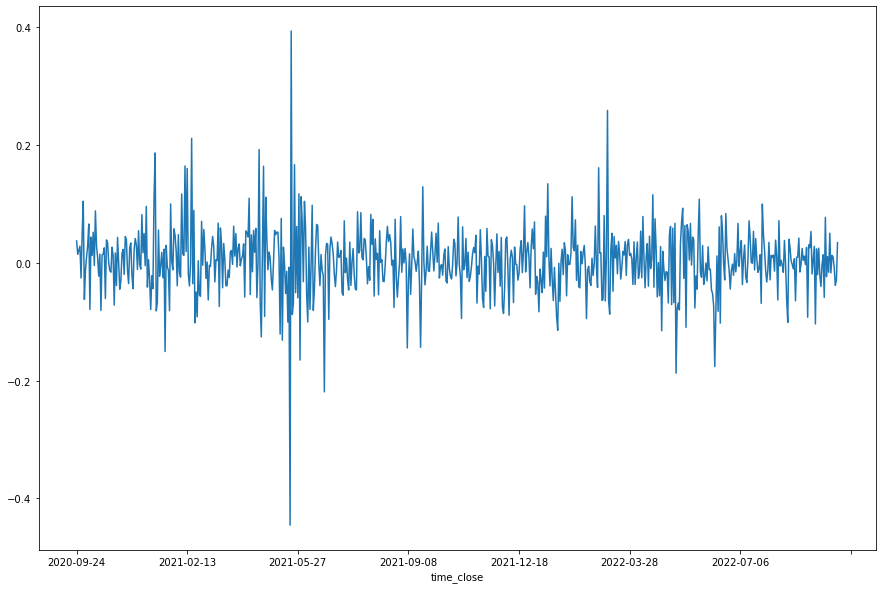

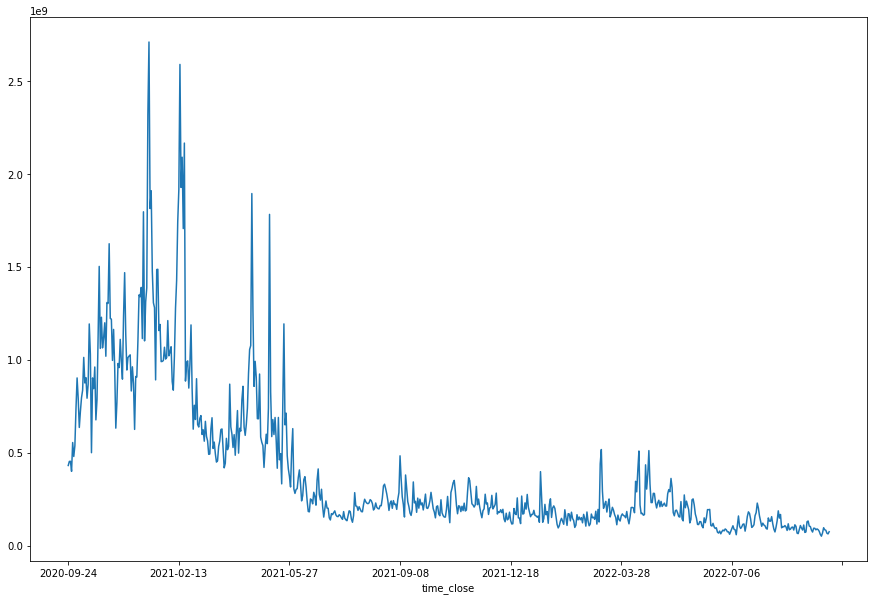

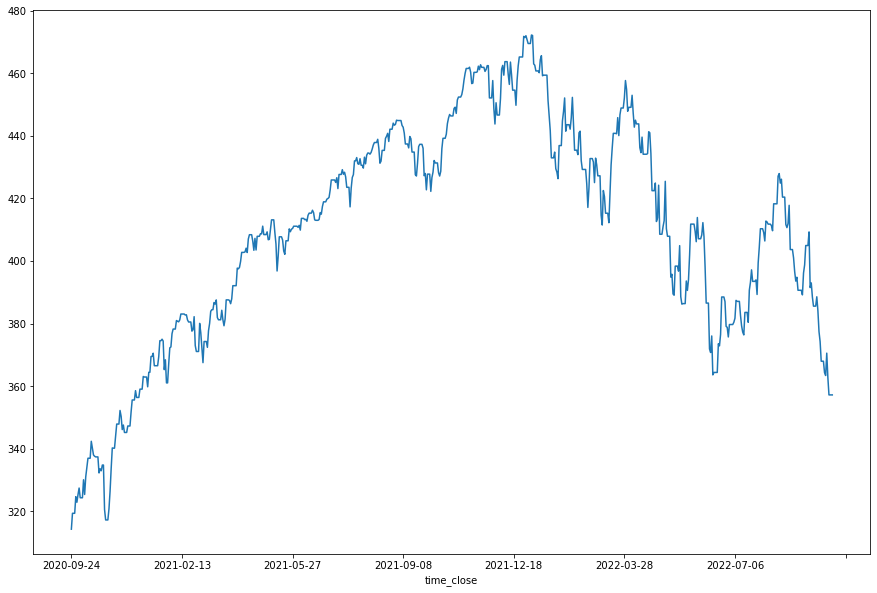

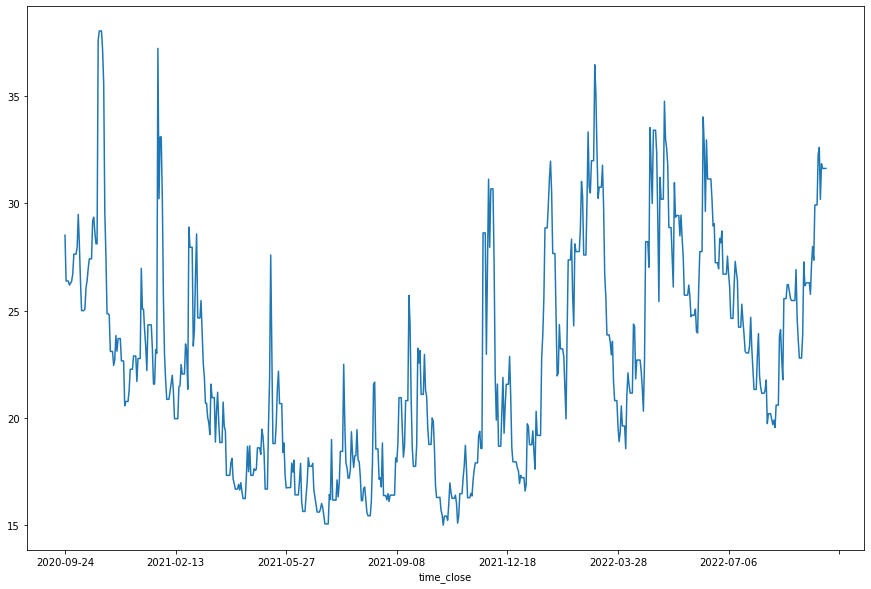

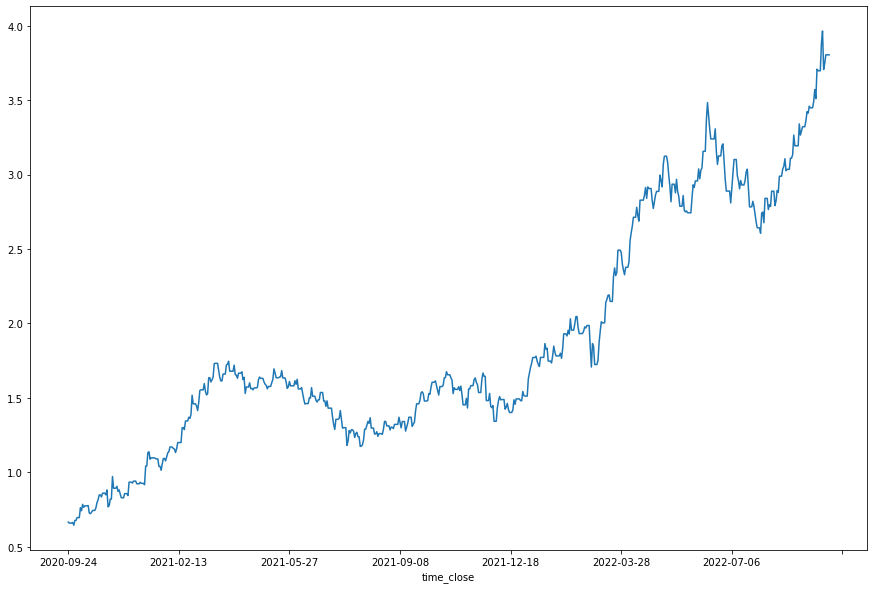

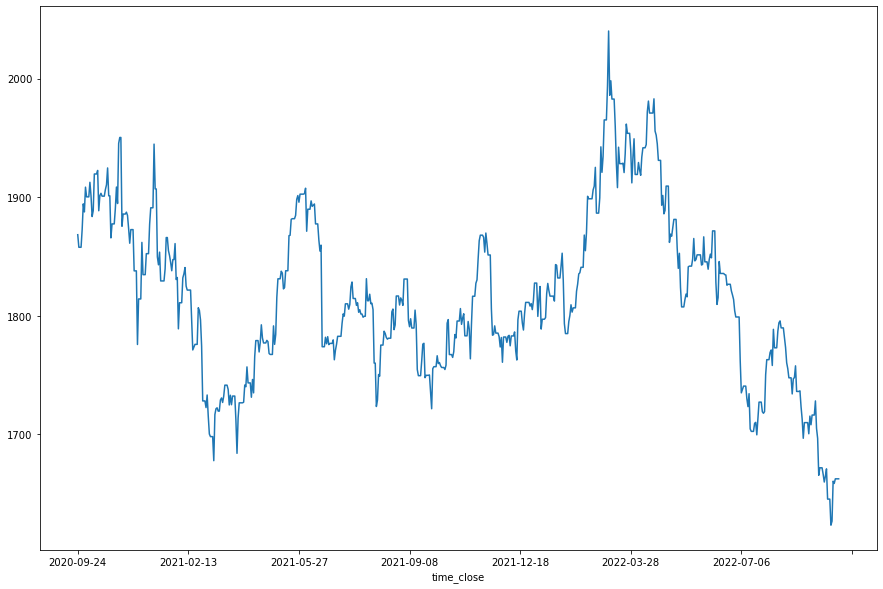

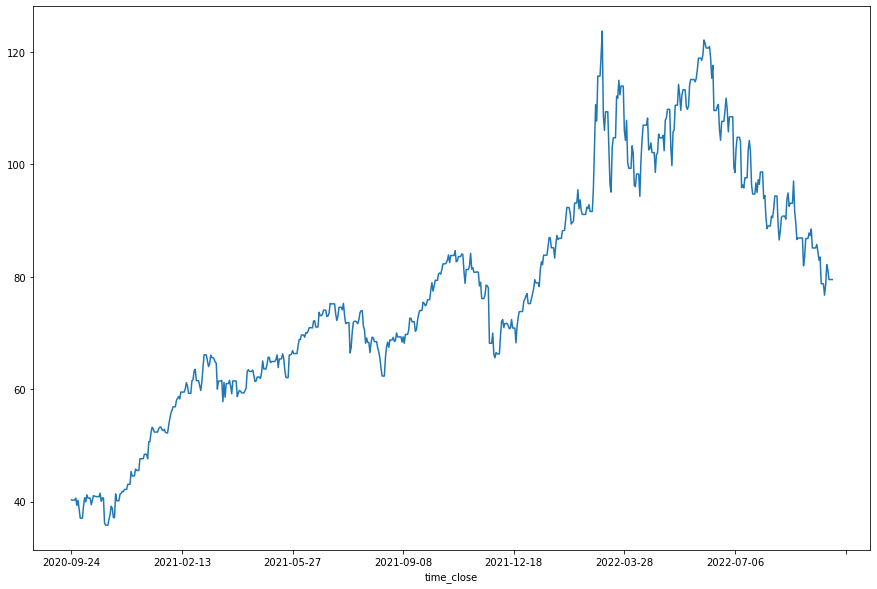

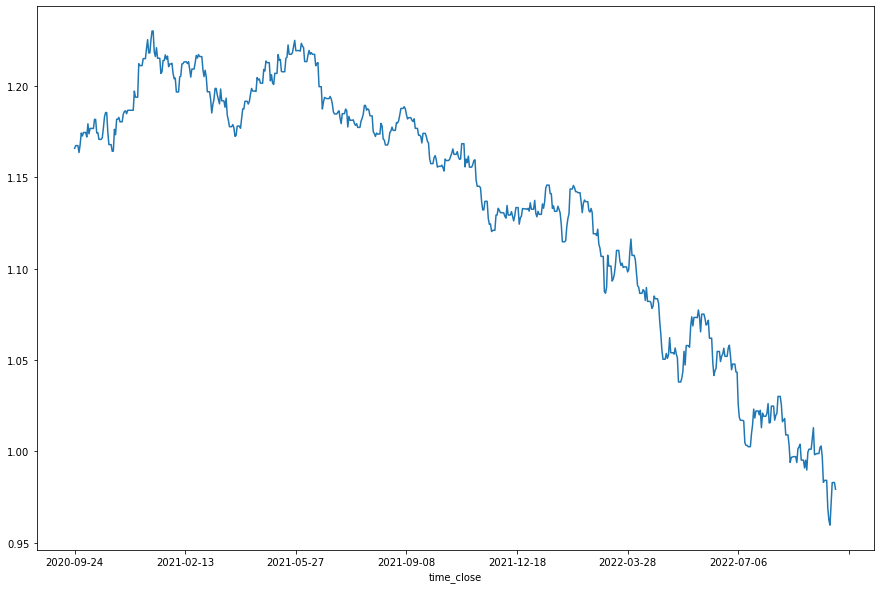

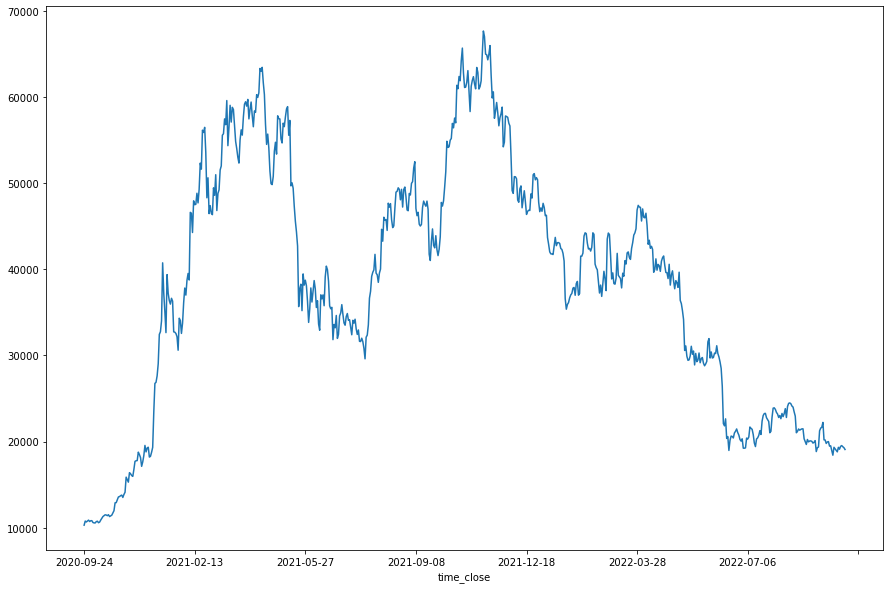

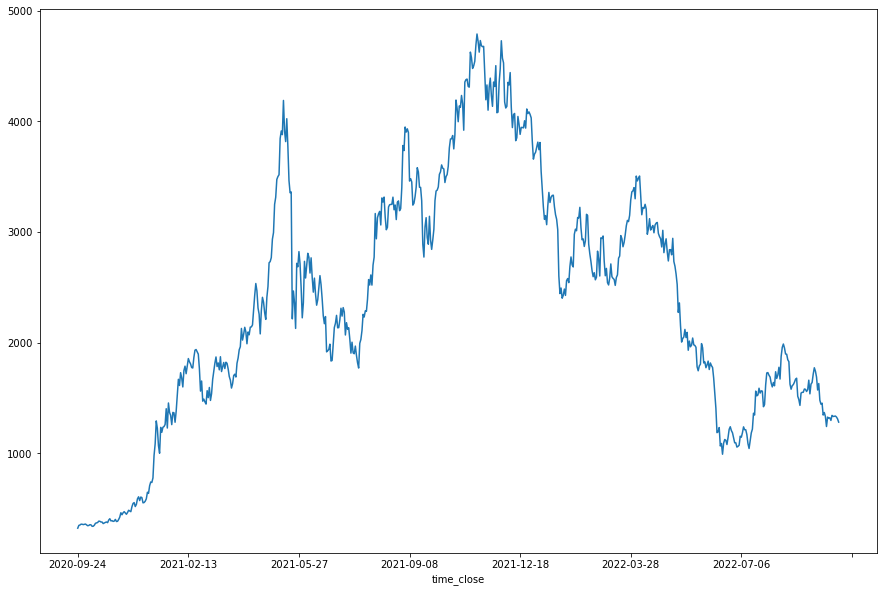

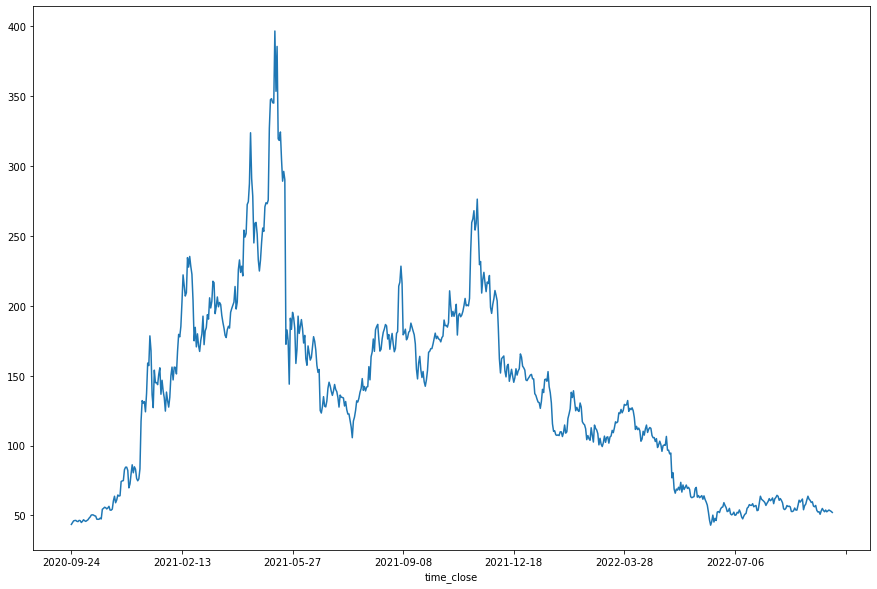

In [8]:
from statsmodels.tsa.stattools import adfuller
List=['tomorrow_change','volume','SPY','VIX','TY_Treasury','Gold','Oil','EUR_USD','BTC_close','ETH_close','LTC_close']
for i in List:
    timeseries = dfreg[i].dropna()
    result = adfuller(timeseries)
    plt.figure(figsize=(15, 10))
    ax = timeseries.plot(secondary_y=False, logy=False)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')



tomorrow_change and VIX are stationary.

In [9]:
#Use percentage change for nonstationary variables
dfreg['SPY_change']=dfreg['SPY'].pct_change()
dfreg['Gold_change']=dfreg['Gold'].pct_change()
dfreg['Oil_change']=dfreg['Oil'].pct_change()
dfreg['BTC_change']=dfreg['BTC_close'].pct_change()
dfreg['ETH_change']=dfreg['ETH_close'].pct_change()
dfreg['LTC_change']=dfreg['LTC_close'].pct_change()
dfreg

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,EUR_USD,BTC_close,ETH_close,LTC_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,...,1.165854,10295.054804,322.801017,43.575650,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,1.167324,10773.534000,348.029329,44.790372,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,1.167324,10668.141934,351.552190,46.090238,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,1.167324,10769.604523,359.182175,46.340146,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,1.163535,10881.984006,358.283277,46.434781,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,0.970817,19445.124438,1333.964086,53.258766,-0.020889,-0.001144,-0.011199,0.017353,0.000887,0.012806
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,0.982956,19532.627889,1336.776474,53.855640,-0.015464,0.002352,-0.021421,0.004500,0.002108,0.011207
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,0.982956,19400.000434,1327.829013,53.365201,0.000000,0.000000,0.000000,-0.006790,-0.006693,-0.009107


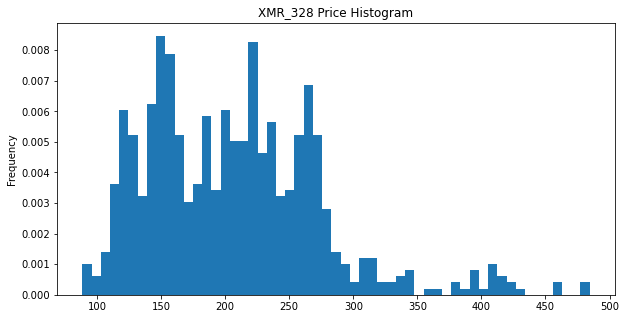

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
dfreg['close'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Price Histogram')
plt.show() 

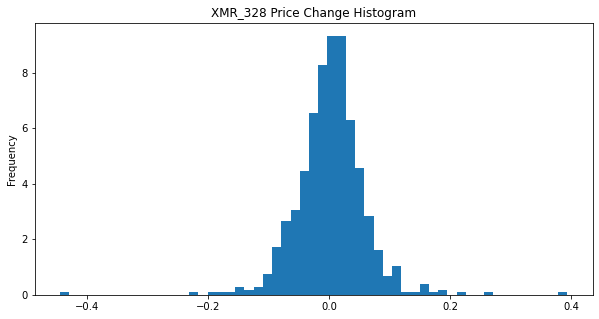

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
dfreg['tomorrow_change'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Price Change Histogram')
plt.show() 

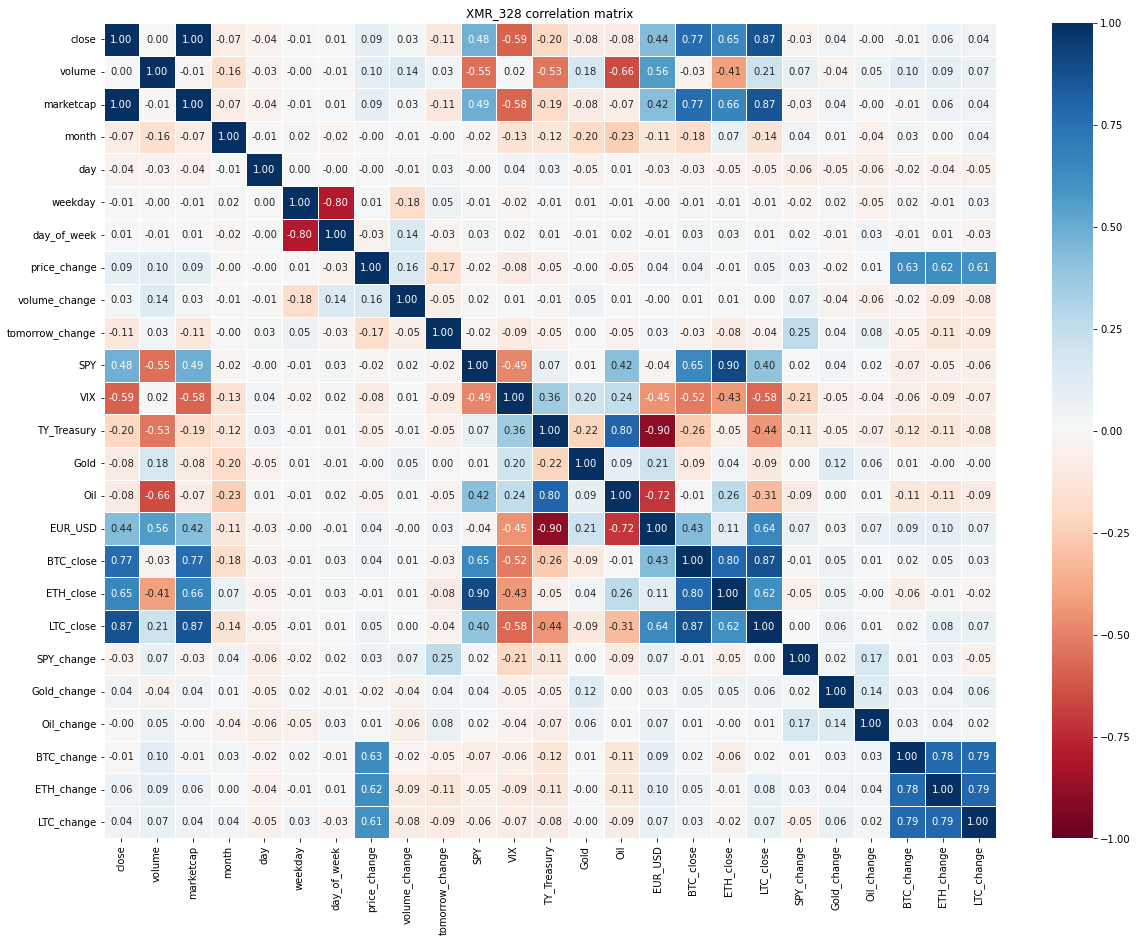

In [12]:
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dfreg.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XMR_328 correlation matrix')
plt.show()

array([<AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>,
       <AxesSubplot:xlabel='time_close'>], dtype=object)

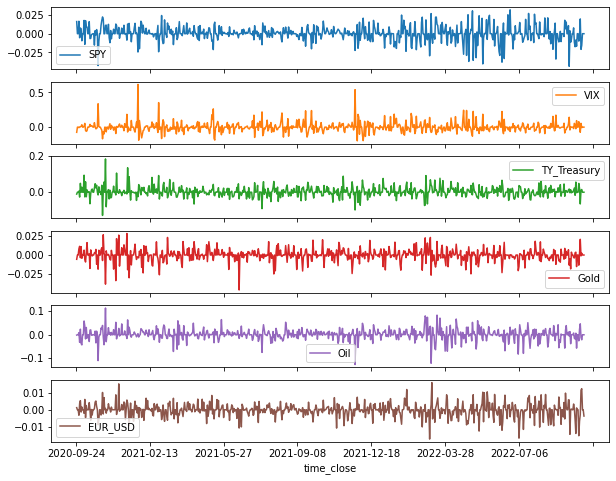

In [13]:
dfreg[['SPY', 'VIX', 'TY_Treasury', 'Gold', 'Oil', 'EUR_USD']].pct_change().plot(subplots=True,figsize=(10,8))

In [15]:
dfreg.drop(dfreg.head(1).index, inplace=True)
dfreg.head()

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,EUR_USD,BTC_close,ETH_close,LTC_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,1.167324,10668.141934,351.552190,46.090238,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,1.167324,10769.604523,359.182175,46.340146,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,1.163535,10881.984006,358.283277,46.434781,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,1,-0.025720,-0.135473,0.048048,...,1.167883,10719.833837,355.271083,45.794669,-0.005446,0.011480,-0.032266,-0.014901,-0.008407,-0.013785
2020-09-30,99.802564,5.367328e+08,1.767815e+09,9,30,2,1,0.048048,0.121134,0.104874,...,1.174205,10812.993870,357.953038,45.588563,0.007582,-0.003590,0.023670,0.008690,0.007549,-0.004501


In [16]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfreg.copy()
y = X.pop('tomorrow_change')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
#Scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
factors = ['volume_change','SPY_change','VIX','Gold_change','Oil_change',
           'BTC_change','ETH_change','LTC_change']
scaler=StandardScaler()
X_train = pd.DataFrame(X_train[factors].copy())
X_train[factors] = scaler.fit_transform(X_train[factors])
X_test = pd.DataFrame(X_test[factors].copy())
X_test[factors] = scaler.transform(X_test[factors])

In [18]:
X_train

,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change
time_close,,,,,,,,
2020-09-26,-0.113022,-0.052861,0.897309,0.000439,-0.092392,-0.294847,0.102537,0.424798
2020-09-27,-0.494988,-0.052861,0.897309,0.000439,-0.092392,0.158595,0.319692,0.043893
2020-09-28,1.115578,1.804824,0.860102,0.967710,0.282416,0.180313,-0.134184,-0.010662
2020-09-29,-0.546144,-0.661965,0.875768,1.366566,-1.483155,-0.415140,-0.244899,-0.266128
2020-09-30,0.267345,0.795148,0.895351,-0.426738,0.927866,0.139314,0.054288,-0.116269
...,...,...,...,...,...,...,...,...
2022-05-13,-0.562194,2.621127,1.384918,-1.069629,1.678358,-0.439706,-1.396843,-0.722591
2022-05-14,-1.476481,-0.052861,1.384918,0.000439,-0.092392,-0.020302,0.216306,0.678855
2022-05-15,-0.428581,-0.052861,1.384918,0.000439,-0.092392,0.299425,0.036719,-0.224700


In [19]:
X_test

,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change
time_close,,,,,,,,
2022-05-18,-0.372383,-4.561540,1.794197,-0.150089,-1.169972,0.231712,0.344061,1.250101
2022-05-19,-0.468377,-0.737869,1.478915,1.658389,0.938088,-1.307552,-1.535575,-1.570731
2022-05-20,-0.166377,-0.004039,1.494581,0.039224,0.299422,1.020464,0.717830,1.187871
2022-05-21,1.611038,-0.052861,1.494581,0.000439,-0.092392,-0.812227,-0.567716,-0.771625
2022-05-22,-1.368791,-0.052861,1.494581,0.000439,-0.092392,0.088757,0.056704,0.306517
...,...,...,...,...,...,...,...,...
2022-09-29,-0.482325,-2.389200,1.966525,-0.135734,-0.575104,0.342917,-0.070620,0.163068
2022-09-30,-0.212108,-1.782389,1.923443,0.280270,-1.015692,0.040829,-0.047728,0.137266
2022-10-01,-0.740456,-0.052861,1.923443,0.000439,-0.092392,-0.224517,-0.212761,-0.190611


Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [21]:
#from sklearn import linear_model
#reg = linear_model.LinearRegression()
#reg.fit(X_train,y_train)
#LinearRegression()
#reg.coef_

In [22]:
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
model.coef_

array([-0.00489049,  0.01276969, -0.00319729,  0.00135745,  0.00238915,
        0.00811939, -0.01289457, -0.00252855])

              Actual  Predicted
time_close                     
2022-05-18 -0.109457  -0.067865
2022-05-19  0.064800   0.008803
2022-05-20  0.053748  -0.004207
2022-05-21  0.004827  -0.007861
2022-05-22  0.067004   0.003250
...              ...        ...
2022-09-29  0.009835  -0.029699
2022-09-30 -0.008111  -0.026304
2022-10-01 -0.038118   0.000994
2022-10-02 -0.028520   0.000399
2022-10-03  0.034424  -0.001694

[138 rows x 2 columns]
Coefficient of determination: 0.17


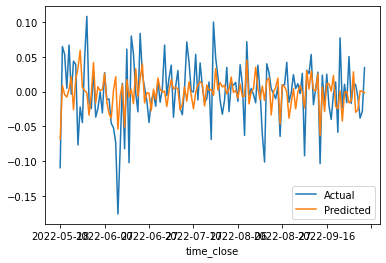

In [24]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()